In [4]:
import bs4
import nltk
import pandas as pd
import seaborn as sns
import string
import numpy as np
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup 
from langdetect import detect
from wordcloud import WordCloud
from pytagcloud import create_tag_image, make_tags
from pytagcloud.lang.counter import get_tag_counts
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [5]:
url = 'https://www.tutorialspoint.com/php/index.htm'
r = requests.get(url, headers={'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}, timeout=15)

In [6]:
soup = BeautifulSoup(r.content,"html.parser") # create a new bs4 object from the html data loaded
soup

<!DOCTYPE html>

<!--[if IE 8]><html class="ie ie8"> <![endif]-->
<!--[if IE 9]><html class="ie ie9"> <![endif]-->
<!--[if gt IE 9]><!--> <html> <!--<![endif]-->
<head>
<!-- Basic -->
<meta charset="utf-8"/>
<title>PHP Tutorial</title>
<meta content="PHP Tutorial for Beginners - Learn PHP in simple and easy steps starting from basic to advanced concepts with examples including PHP Built-in Function, Predefined Variables Examples, Object Oriented PHP, Numbers, Scalars, Arrays, Hash File I/O, IF, ELSEIF, Do, While Loops, Operators, Regular Expressions, GET, POST, Subroutines, Coding Standard, Modules, File Management, Socket Communication, Reference, Special Variables, Syntax Overview, Form Validation, Advanced PHP, Library, Web Design, PayPal Integration, MySQL Login, Ajax Search, Ajax XML Parser, Ajax Auto Complete Search, Ajax RSS Feed Example, XML Introduction, Simple XML, Simple XML GET, SAX Parser Example, DOM Parser Example, Frame Works, Core php vs frame works php, Design Pattern

In [7]:
def cleanMe(soup):
    for script in soup(["script", "style"]): # remove all javascript and stylesheet code
        script.extract()
    # get text
    text = soup.get_text()
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text

In [8]:
cl = cleanMe(soup)
cl

"PHP Tutorial\nJobs\nExamples\nWhiteboard\nNet Meeting\nTools\nArticles\nFacebook\nGoogle+\nTwitter\nLinkedin\nYouTube\nHome\nQ/A\nLibrary\nVideos\nTutors\nCoding Ground\nStore\nSearch\nPHP Tutorial\nPHP - Home\nPHP - Introduction\nPHP - Environment Setup\nPHP - Syntax Overview\nPHP - Variable Types\nPHP - Constants\nPHP - Operator Types\nPHP - Decision Making\nPHP - Loop Types\nPHP - Arrays\nPHP - Strings\nPHP - Web Concepts\nPHP - GET & POST\nPHP - File Inclusion\nPHP - Files & I/O\nPHP - Functions\nPHP - Cookies\nPHP - Sessions\nPHP - Sending Emails\nPHP - File Uploading\nPHP - Coding Standard\nAdvanced PHP\nPHP - Predefined Variables\nPHP - Regular Expression\nPHP - Error Handling\nPHP - Bugs Debugging\nPHP - Date & Time\nPHP & MySQL\nPHP & AJAX\nPHP & XML\nPHP - Object Oriented\nPHP - For C Developers\nPHP - For PERL Developers\nPHP Form Examples\nPHP - Form Introduction\nPHP - Validation Example\nPHP - Complete Form\nPHP login Examples\nPHP - Login Example\nPHP - Facebook Login\n

In [9]:
dataScrap = cl.replace(',','\n').replace('.','\n').split('\n')
dataScrap

['PHP Tutorial',
 'Jobs',
 'Examples',
 'Whiteboard',
 'Net Meeting',
 'Tools',
 'Articles',
 'Facebook',
 'Google+',
 'Twitter',
 'Linkedin',
 'YouTube',
 'Home',
 'Q/A',
 'Library',
 'Videos',
 'Tutors',
 'Coding Ground',
 'Store',
 'Search',
 'PHP Tutorial',
 'PHP - Home',
 'PHP - Introduction',
 'PHP - Environment Setup',
 'PHP - Syntax Overview',
 'PHP - Variable Types',
 'PHP - Constants',
 'PHP - Operator Types',
 'PHP - Decision Making',
 'PHP - Loop Types',
 'PHP - Arrays',
 'PHP - Strings',
 'PHP - Web Concepts',
 'PHP - GET & POST',
 'PHP - File Inclusion',
 'PHP - Files & I/O',
 'PHP - Functions',
 'PHP - Cookies',
 'PHP - Sessions',
 'PHP - Sending Emails',
 'PHP - File Uploading',
 'PHP - Coding Standard',
 'Advanced PHP',
 'PHP - Predefined Variables',
 'PHP - Regular Expression',
 'PHP - Error Handling',
 'PHP - Bugs Debugging',
 'PHP - Date & Time',
 'PHP & MySQL',
 'PHP & AJAX',
 'PHP & XML',
 'PHP - Object Oriented',
 'PHP - For C Developers',
 'PHP - For PERL Develo

In [10]:
numID = 0
numEN = 0
for num in range(len(dataScrap)):
    try:
        dtc = detect(dataScrap[num])
        if dtc == 'id':
            numID = numID + 1
        elif dtc == 'en':
            numEN = numEN + 1
    except:
        continue
print(numID)
print(numEN)

5
54


In [11]:
if numID > numEN :
    print('Ini Website Indonesia')
else:
    print('ini website english')

ini website english


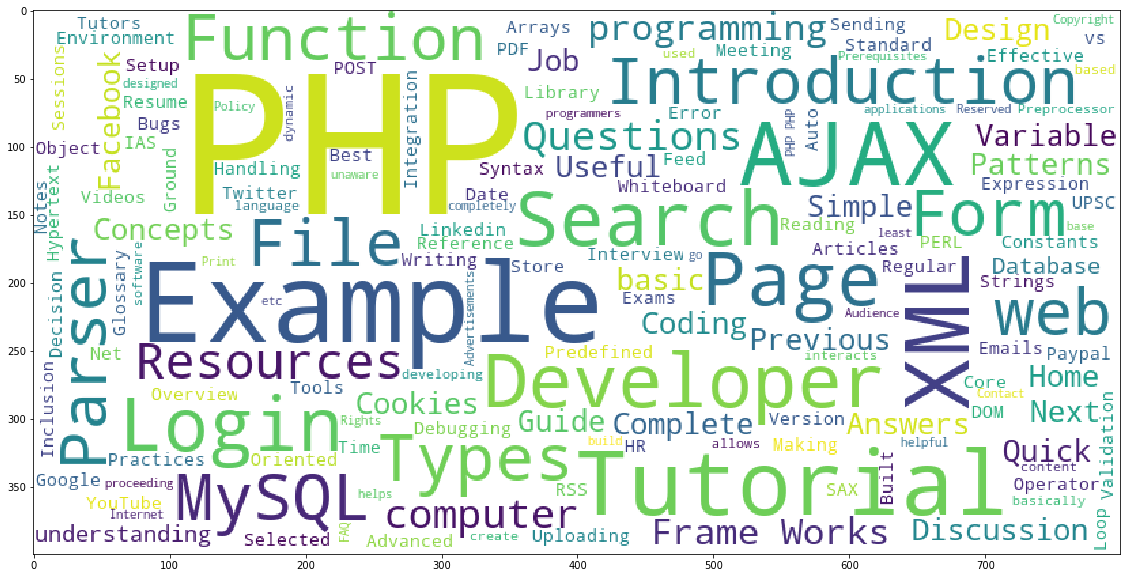

In [12]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(cl)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)

In [15]:
dewasa_english = pd.read_csv('/home/fadli/Anaconda Project/My Sentiment Analysist/dataset/dewasa_english.txt',sep='\t',names=["label","text"])
dewasa_english.describe()
dewasa_english.groupby('label').describe()


text                                      
       count unique                       top freq
label                                             
normal   172    167                       CSS    3
porn     143    129  Flirting With A Stranger    3

In [14]:

    dewasa_english = pd.read_csv('/home/fadli/Anaconda Project/My Sentiment Analysist/dataset/dewasa_english.txt',sep='\t',names=["label","text"])
    dewasa_english.describe()
    dewasa_english.groupby('label').describe()
    def text_process(text):
        noPunc = [char for char in text if char not in string.punctuation]
        noPunc = ''.join(noPunc)
        return [kata for kata in noPunc.split() if kata.lower() not in stopwords.words('english')]
    
    bow_transformer = CountVectorizer(analyzer=text_process).fit(dewasa_english['text'])
    dewasa_bow = bow_transformer.transform(dewasa_english['text'])
    tfidf_transf = TfidfTransformer().fit(dewasa_bow)
    dewasa_tfidf = tfidf_transf.transform(dewasa_bow)
    dewasa_train, dewasa_test, label_train, label_test = train_test_split(dewasa_english['text'],dewasa_english['label'],test_size=0.2)
    print(len(dewasa_train),len(dewasa_test),len(dewasa_train) + len(dewasa_test))
    pipelineSVM = Pipeline([
        ('bow',CountVectorizer(analyzer=text_process)),
        ('tfidf',TfidfTransformer()),
        ('classifier',LinearSVC())
    ])
    pipelineSVM.fit(dewasa_train,label_train)
    prediksiSVM = pipelineSVM.predict(dewasa_test)
    print(classification_report(prediksiSVM,label_test))
    datanya = pipelineSVM.predict(dataScrap)
    presentase_positif_porn = len(datanya[datanya == 'porn'])/len(datanya) * 100
    presentase_positif_porn
    if presentase_positif_porn >= 5 :
        print('ini website porno')
    else :
        print('ini website biasa')  

IndentationError: unexpected indent (<ipython-input-14-3a9ebd432ee0>, line 2)